<h1><font color='red'><u><center>Census Income Project</center></u></font></h2>
<h2><font color='darkblue'><u><center>Evaluation Project-5</center></u></font></h2>

<h3><font color='maroon'><u>Abstract/Excercise Summary</u></font></h3>

<h5><font color='grey'>
<br><br>1. The data was imported into Python using standard pandas(), it was seen that, although there are no Nan values, there were '?' values present in three columns. instead of replacing them, used the pandas function itself to recognise '?' as Nan values. If this were not an evaluation project, would have ideally done all of this in one step.
<br><br>2. From preliminary investigation, there were 15 columns, 14 features and 1 target label, which is 'Income'. among the features, using basic info function, we could say that there were 6 numerical and 8 categorical features, whether the ratio changes, we will know only by checking of unique values. As there can be times, when although type is integer, the number of unique values maybe be limited, hence can turn out as categorical.
<br><br>3. It was also found that the dataset has an imbalanced records towards the target variable, where it was ~75%:25% ratio. This was corrected in the pre-processing steps.
<br><br>4. The '?' in the datset now recognised as Nan values, in the three feature columns were replaced with the most frequent occuring term using the mode().
<br><br>5. EDA was conducted using Visual and function wise representation. detailed inferences are mentioned along side each plot. But we could summarise, that although the initial plots, seemed like the data infered that income was racial and gender discrimating, on further exploration, we figured that it was a problem with sample collection and not the actual case. In the real world, Race and gender did not was quite proportionate. although there isnt much data to say whether they are absolutely equal. but we infered that we can rule them out from the feature selection. 
<br>hence, EDA along with Feature selection, infered that we remove 4 features,namely- 'Race', 'Sex','Capital_loss', 'Native_country'.
<br><br>6. Next, we ran a user defined function called num_cat() to determine whether the feature columns are numerical or categorical, by setting a threshold for the number of unique values. In this case the threshold was chosen to be '16', which was logically concluded after the EDA. Here we discovered '9' numerical and '5' categorical feature columns. 
<br><br>7. The identified Categorical feature names were then used to label encode unique values into numbers.
<br><br>8. Next we used the Random over Sampler function to remove the remove the imbalance in the dataset. and we achieved a 50% : 50% ratio towards the label.
<br><br>9. We used the standard scalar function to standardise the data before we move on to the model selction and data train-test split.
<br><br>10. Next we used a user defined function to choose best classification model, its metrics, and random state.
<br>Here we achieved a Max Accuracy score corresponding to random state  69 is 0.9350728155339806 and best model is  RandomForestClassifier() with f1score as  0.9382335963055608....thats ~93.50%
<br><br>11. We went on to see if we can improve the accuracy by Hyper parameter tuning(HPT), this we did using Randomised search CV, and finally got the parameters max_depth=40, n_estimators=142.
<br> With the above parameters, we finally attained the Accuracy score: 93.09 and F1 score: 93.42..
<br><br>12. Next we used the Confusion matrix to see the total number of true and false positives... which also seems to be fine.
<br><br>13. Finally we generated the Classification report.
   <br> with the macro avg as   precision:  0.93   recall:  0.92  f1-Score:  0.92   support:   9888
</font></h5>
<h3><font color='green'> Hyper Parameter Tuned - Model built, with the metreics showing a success in classifying whether an individual earns above 50k or not based on the features  : Age,	Workclass,	Fnlwgt,	Education,	Education_num,	Marital_status,	Occupation,	Relationship,	Capital_gain,	Hours_per_week.

<h3><font color='maroon'><u>Import Required libraries</u></font></h3>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#hpT
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

<h3><font color='maroon'><u>Reading and Analysing Data</u></font></h3>

In [4]:
datana=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv',header=0)

In [5]:
#checking for Null values.
datana.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
datana.sample(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
16669,47,Self-emp-inc,201699,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
16113,60,Private,187458,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
22145,30,Private,97521,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
14321,37,Federal-gov,419053,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
25738,35,Self-emp-inc,79586,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
18699,20,Private,229414,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K
26081,43,Private,122749,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,<=50K
15239,44,Private,368757,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
10558,28,Private,388112,1st-4th,2,Never-married,Farming-fishing,Unmarried,White,Male,0,0,77,Mexico,<=50K
32189,34,Private,220362,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K


There are missing values that have been appended with ' ?' in the data set, so before we begin to analyse the data,let us import them Nan values directly using the pandas' read_csv method itself

In [7]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv',header=0, na_values=' ?')

In [9]:
data.sample(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
18305,27,Private,254500,Some-college,10,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,36,United-States,<=50K
23207,24,Private,464103,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,50,United-States,<=50K
13255,55,Private,160303,HS-grad,9,Widowed,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
17455,33,Private,122116,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
19007,39,Private,181661,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
11938,54,State-gov,32778,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
8733,31,Private,137952,Some-college,10,Married-civ-spouse,Other-service,Husband,Other,Male,0,0,40,Puerto-Rico,<=50K
11227,30,NaN,97281,Some-college,10,Separated,NaN,Not-in-family,White,Male,0,0,60,United-States,<=50K
29063,25,Private,288519,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16625,36,Private,167440,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,44,United-States,<=50K


1. From the above Display, we can see that all the values with '?' have been replaced with Nans.
2. Lets look at the shape of the dataset and the description, before we start with the preprocessing.

In [10]:
#shape of the data is
print('Number of Records: {} Columns: {}'.format(data.shape[0], data.shape[1]))

Number of Records: 32560 Columns: 15


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# Checking for imbalances.
data['Income'].value_counts(normalize=True)


 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64

In [14]:
#checking for Null values.
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<h3><font color='red'><u>Inferences:</u></font></h3><h4>
1. The Dataset is fairly large enough.
<br>2. There were no Null values. But from the data sample, it was evident that there are '?' instead. we needed to address that issue, hence we imported the dataset, using the read_csv(), and enabled the function to identify the '?' as Nans.
<br>3. There are 15 columns, 14 features and one target column. 
<br>4. From preliminary exploration, there seems to be 9 categorical and 6 continious feature columns. we need to confirm the same by looking for number of unique values in each column.
<br>5. The standard Deviation is High in Fnlwgt, very high in capital gain and loss columns, fairly large in the others.
    we need to see how to address them
<br>6. The Dataset is imbalanced. we may have to attend to this too, during pre processing
<br>7. Before we look at data visualisation and modelling, let us fill the Nans with the most occuring elemtns.
<br>8. Only column names-'Workclass', 'Occupation', 'Native_country' have nans.. lets fix this and move forward.

In [15]:
colna=['Workclass', 'Occupation', 'Native_country']
for col in colna:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [16]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [17]:
data.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

1. No more null values or "?" in Data set.
2. Next, lets look at the catagorical data columns, Continious Data columns.
3. Income is the target label, the other columns are the features.
4. For this, we'll use the threshold as 16.. this number is from the inspection of number of unique values in each column.
5. Logic dictates that Education_number although an Int type column, is categorical. 
6. There was Some Ambiguity about 'Fnlwgt' column. whether it contained nominal data, but when compaered to the totla number of records of 32560, there are only about 21647 unique values,hence we can say that they are not unique or categorical values. also lets rename it as Final_weight.
7. We can understand more about the relatioships between the features and label and between features themselves visually and with correlation. if we are not satisfied, we can even consider using K-best feature to detect the best columns for the model with the most the highest unique entropy.

Keeping all of this Information in mind, lets begin our Exlporative Data Analysis(EDA)

<h3><font color='maroon'><u>Explorative Data Analysis(EDA)</u></font></h3>

1. Distribution plot for Age as per  given Dataset

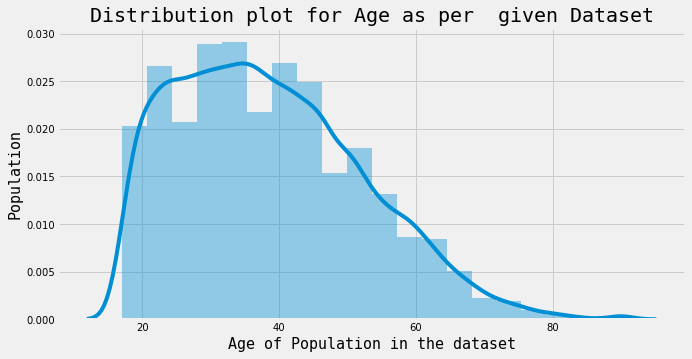

In [110]:
# Creating a distribution plot for 'Age'
age = data['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(data['Age'], bins=20)
plt.title('Distribution plot for Age as per  given Dataset', fontdict={
          'fontname': 'Monospace', 'fontsize': 20,})
plt.xlabel('Age of Population in the dataset', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Population', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

<h3><font color='red'><u>Inferences from the above plot:</u></font></h3><h4>
    1.Shows that the general population starts working at the age of about 18.
<br>    2.They tend to retire by the time they are in their late 50s. and would have all retired by the time they are 80.
<br>    3.Peak age where everyone is working between 20 and 45.
<br>    4. data seems to be alittle right skewed

2. Distribution of Education Levels as per Dataset

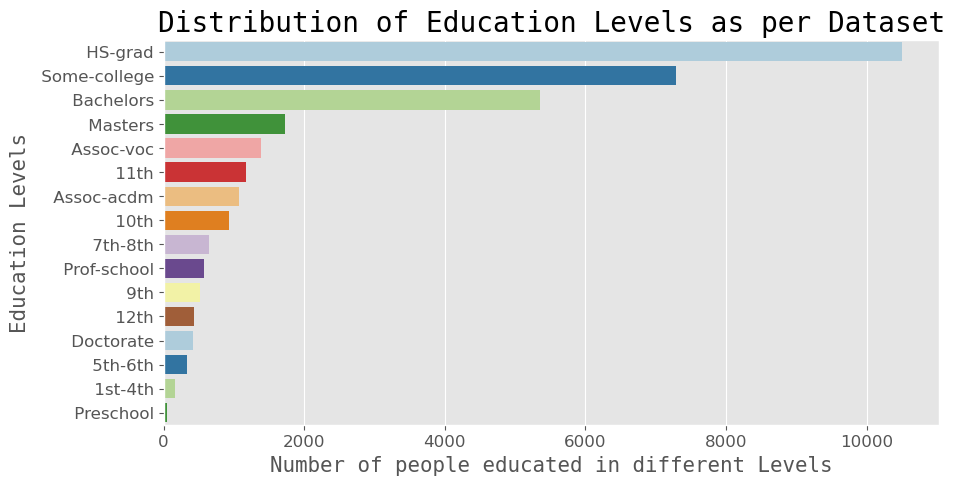

In [138]:
# Creating a barplot for 'Education'
education = data['Education'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education Levels as per Dataset', fontdict={
          'fontname': 'Monospace', 'fontsize': 20})
plt.xlabel('Number of people educated in different Levels', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education Levels', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

<h3><font color='red'><u>Inferences from the above plot:</u></font></h3><h4>
    1.Majority of the population have atleast completed bachelors or masters.
<br>2.Very few cases where people have not even completed their  5th/6th
<br>3.Similarly fewer people who have done their Doctorate.

3. Distribution of Years of Education as per Dataset

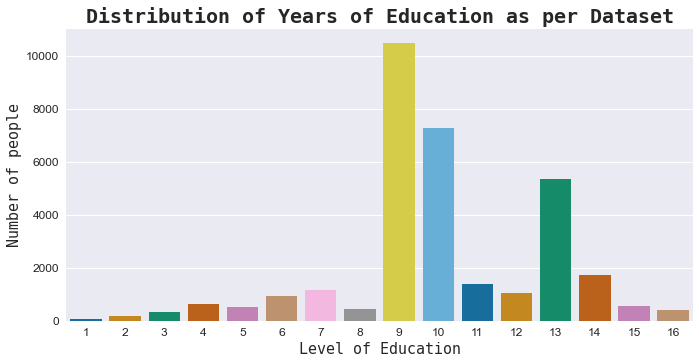

In [122]:
# Creating a barplot for 'Years of Education'
education_number = data['Education_num'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(education_number.index, education_number.values, palette='colorblind')
plt.title('Distribution of Years of Education as per Dataset', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Level of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

As we can see here, majority of the sample population whose data is collected have studied only 9th and 10th level..there is some weight on the 13th level. considering this let us study this column along with salary column.

4. Distribution of Income vs Educational Level

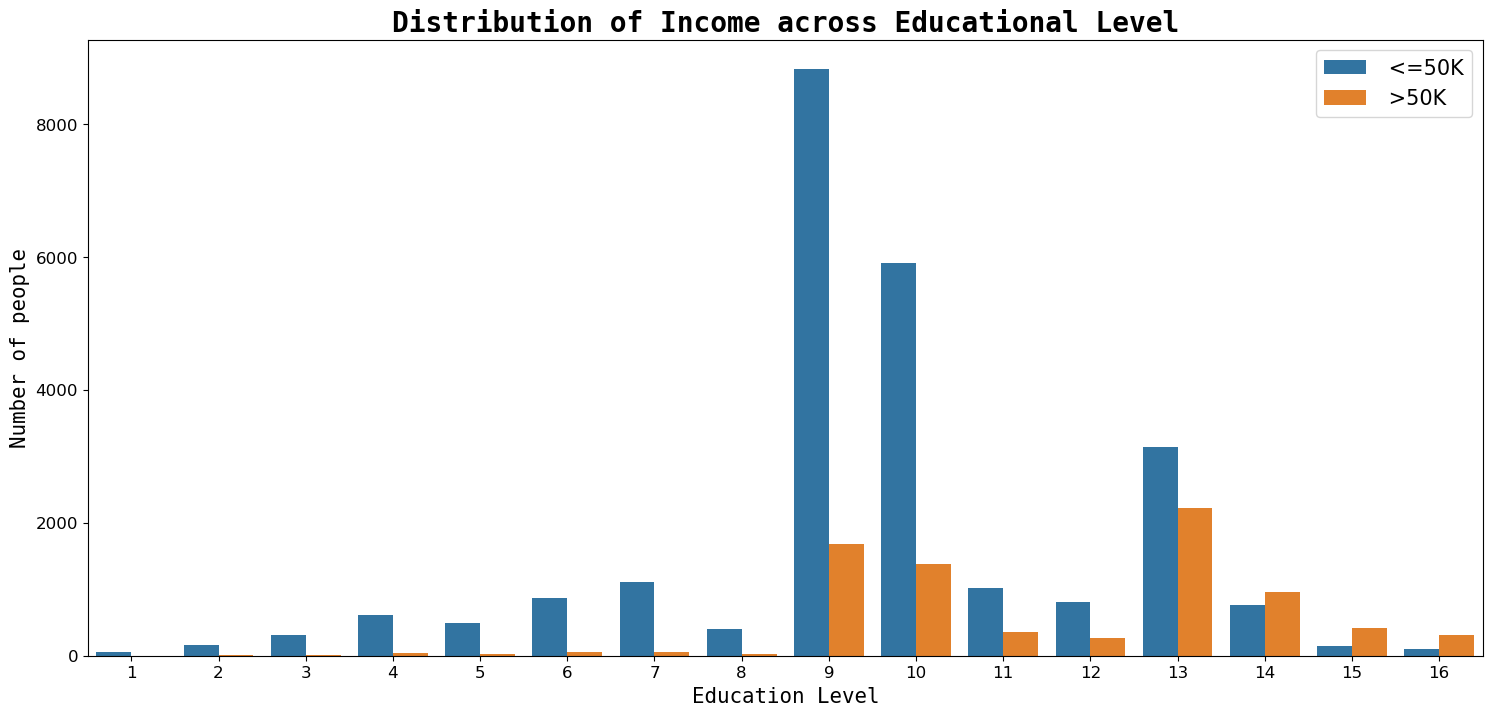

In [130]:
# Creating a countplot of income vs Educational Level
plt.style.use('default')
plt.figure(figsize=(18, 8))
sns.countplot(data['Education_num'], hue=data['Income'])
plt.title('Distribution of Income across Educational Level', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education Level', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

<h3><font color='red'><u>Inferences from the above plot:</u></font></h3><h4>
     1.it is clear from the above plot that the people earning above 50k have generally studied for 9 years or more.
<br> 2.There are a few exceptions of people earning above 50k even without studying as much.but its minimal.
<br> 3.around 75-80% of the people who have studied 13years and more are certainly making above 50k

5. Distribution of Income vs Education

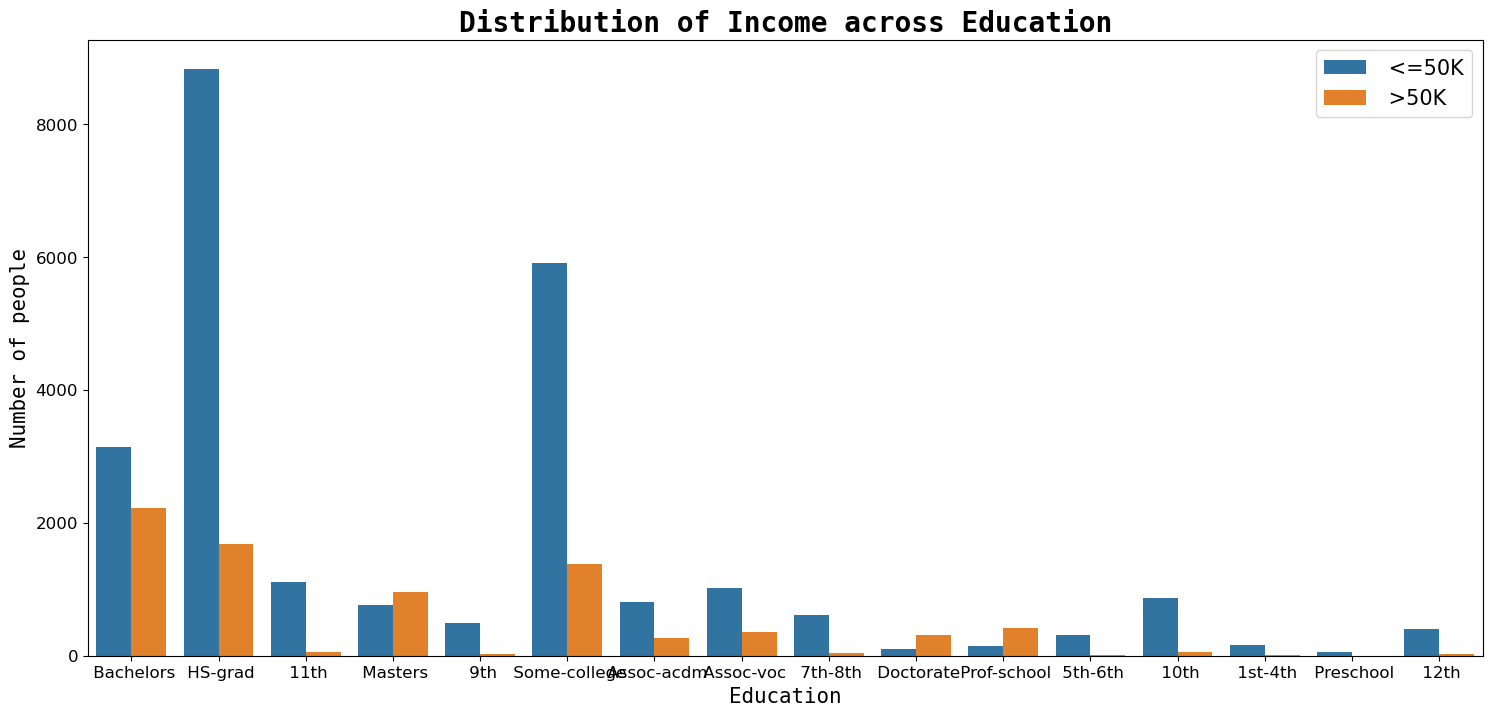

In [136]:
# Creating a countplot of Income vs Education
plt.style.use('default')
plt.figure(figsize=(18, 8))
sns.countplot(data['Education'], hue=data['Income'])
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

<h3><font color='red'><u>Inferences from the above plot:</u></font></h3><h4>
1.inferences are same as from the above plots.


6. Distribution of Gender Vs income

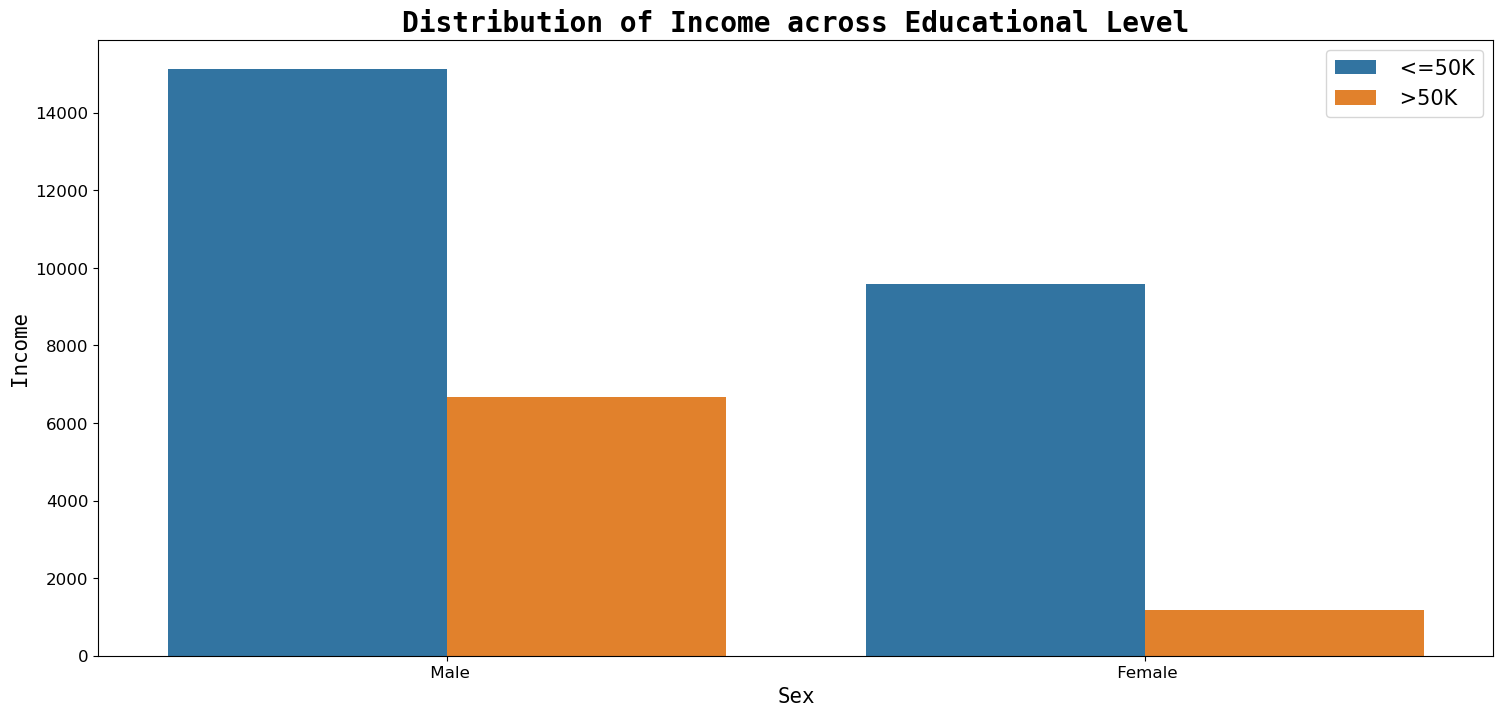

In [133]:
# Creating a countplot of Gender vs income
plt.style.use('default')
plt.figure(figsize=(18, 8))
sns.countplot(data['Sex'], hue=data['Income'])
plt.title('Distribution of Income across Educational Level', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Income', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

7. Distribution of Income Vs Race

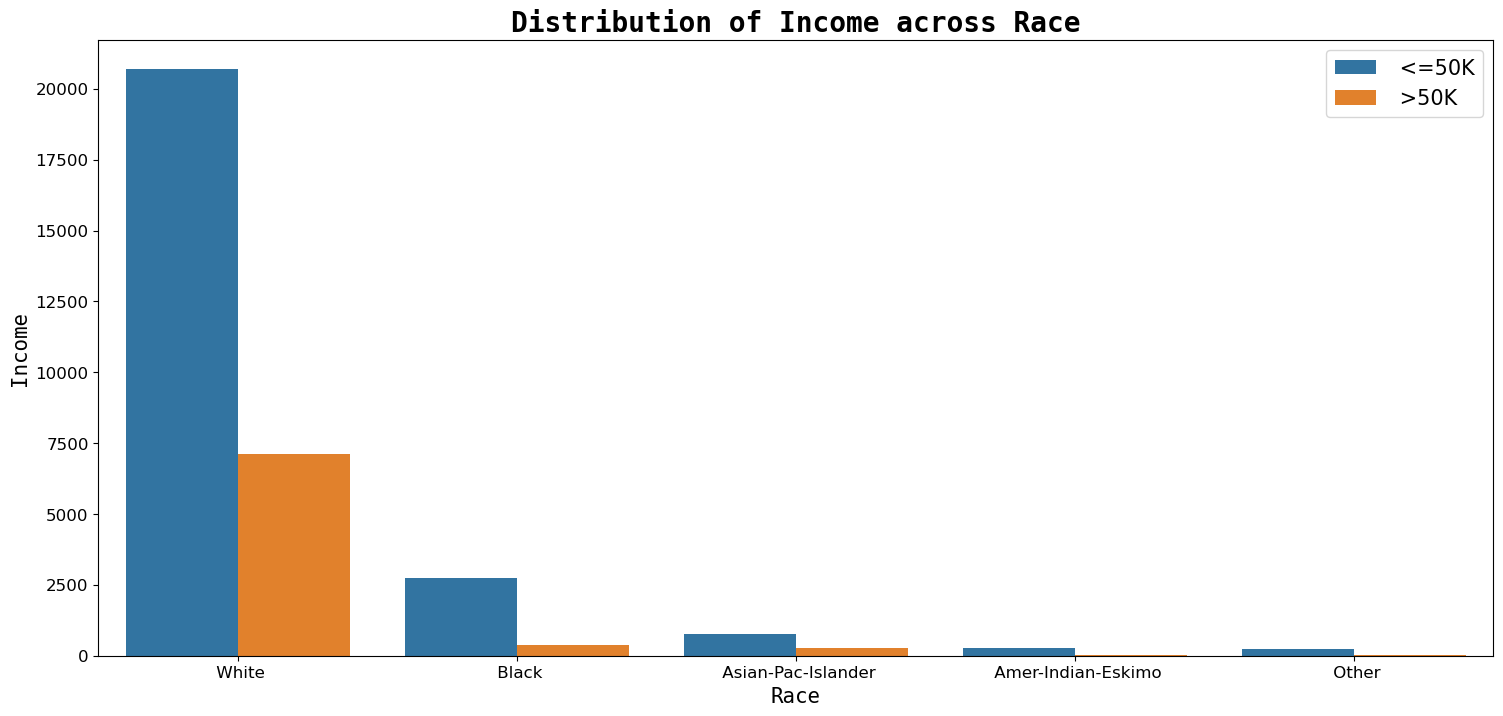

In [139]:
# Creating a countplot of income vs Race
plt.style.use('default')
plt.figure(figsize=(18, 8))
sns.countplot(data['Race'], hue=data['Income'])
plt.title('Distribution of Income across Race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Income', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

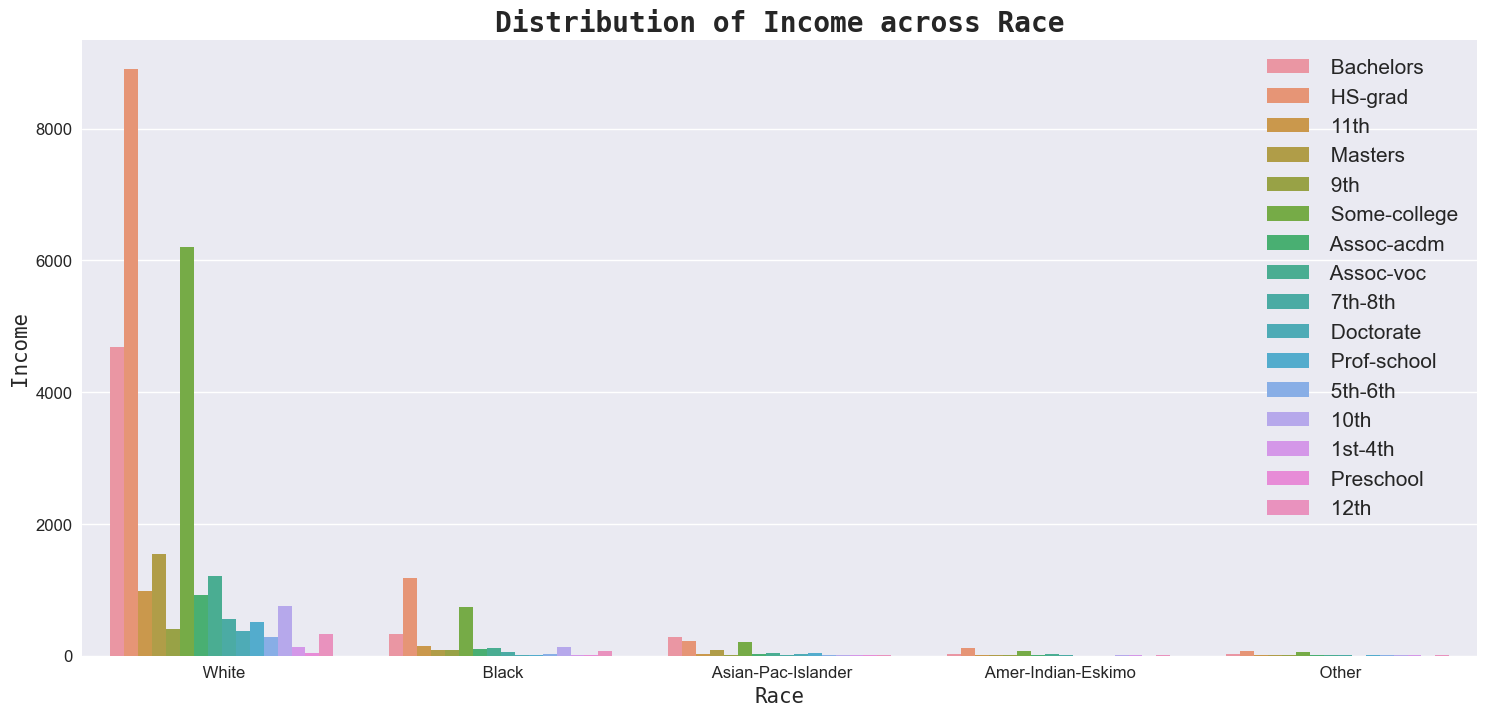

In [147]:
# Creating a countplot of Education vs Race
plt.style.use('seaborn')
plt.figure(figsize=(18, 8))
sns.countplot(data['Race'], hue=data['Education'])
plt.title('Distribution of Income across Race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Income', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

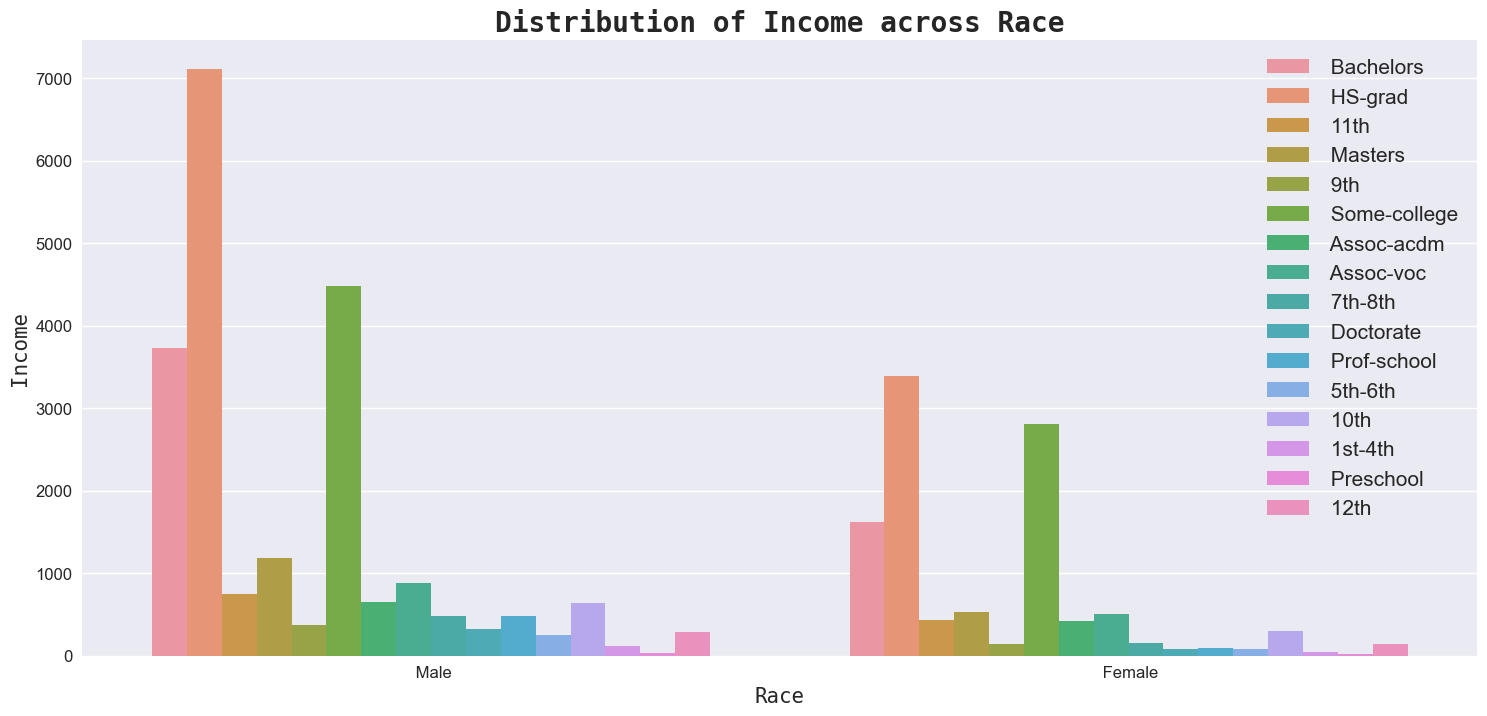

In [149]:
# Creating a countplot of Education vs Gender
plt.style.use('seaborn')
plt.figure(figsize=(18, 8))
sns.countplot(data['Sex'], hue=data['Education'])
plt.title('Distribution of Income across Race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Income', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [18]:
# dividing Dataset into continiuos and discrete....
def num_cat(df):
    num=[]
    cat=[]
    count=df.nunique()
    for i in df.columns:
        if count[i]>16:
            num.append(i)
        else:
            cat.append(i)
    return(num,cat)

In [19]:
print(f'The Numerical/Continious Data Columns are ',num_cat(data)[0])
print(f'The Catagorical/Discrete Data Columns are ',num_cat(data)[1])

The Numerical/Continious Data Columns are  ['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']
The Catagorical/Discrete Data Columns are  ['Workclass', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Income']


In [20]:
#Need to Encode the Target label as it wont show up on heatmap otherwise

LE = LabelEncoder()
data['Income'] = LE.fit_transform(data['Income'])

In [21]:
sns.set(font_scale=8)

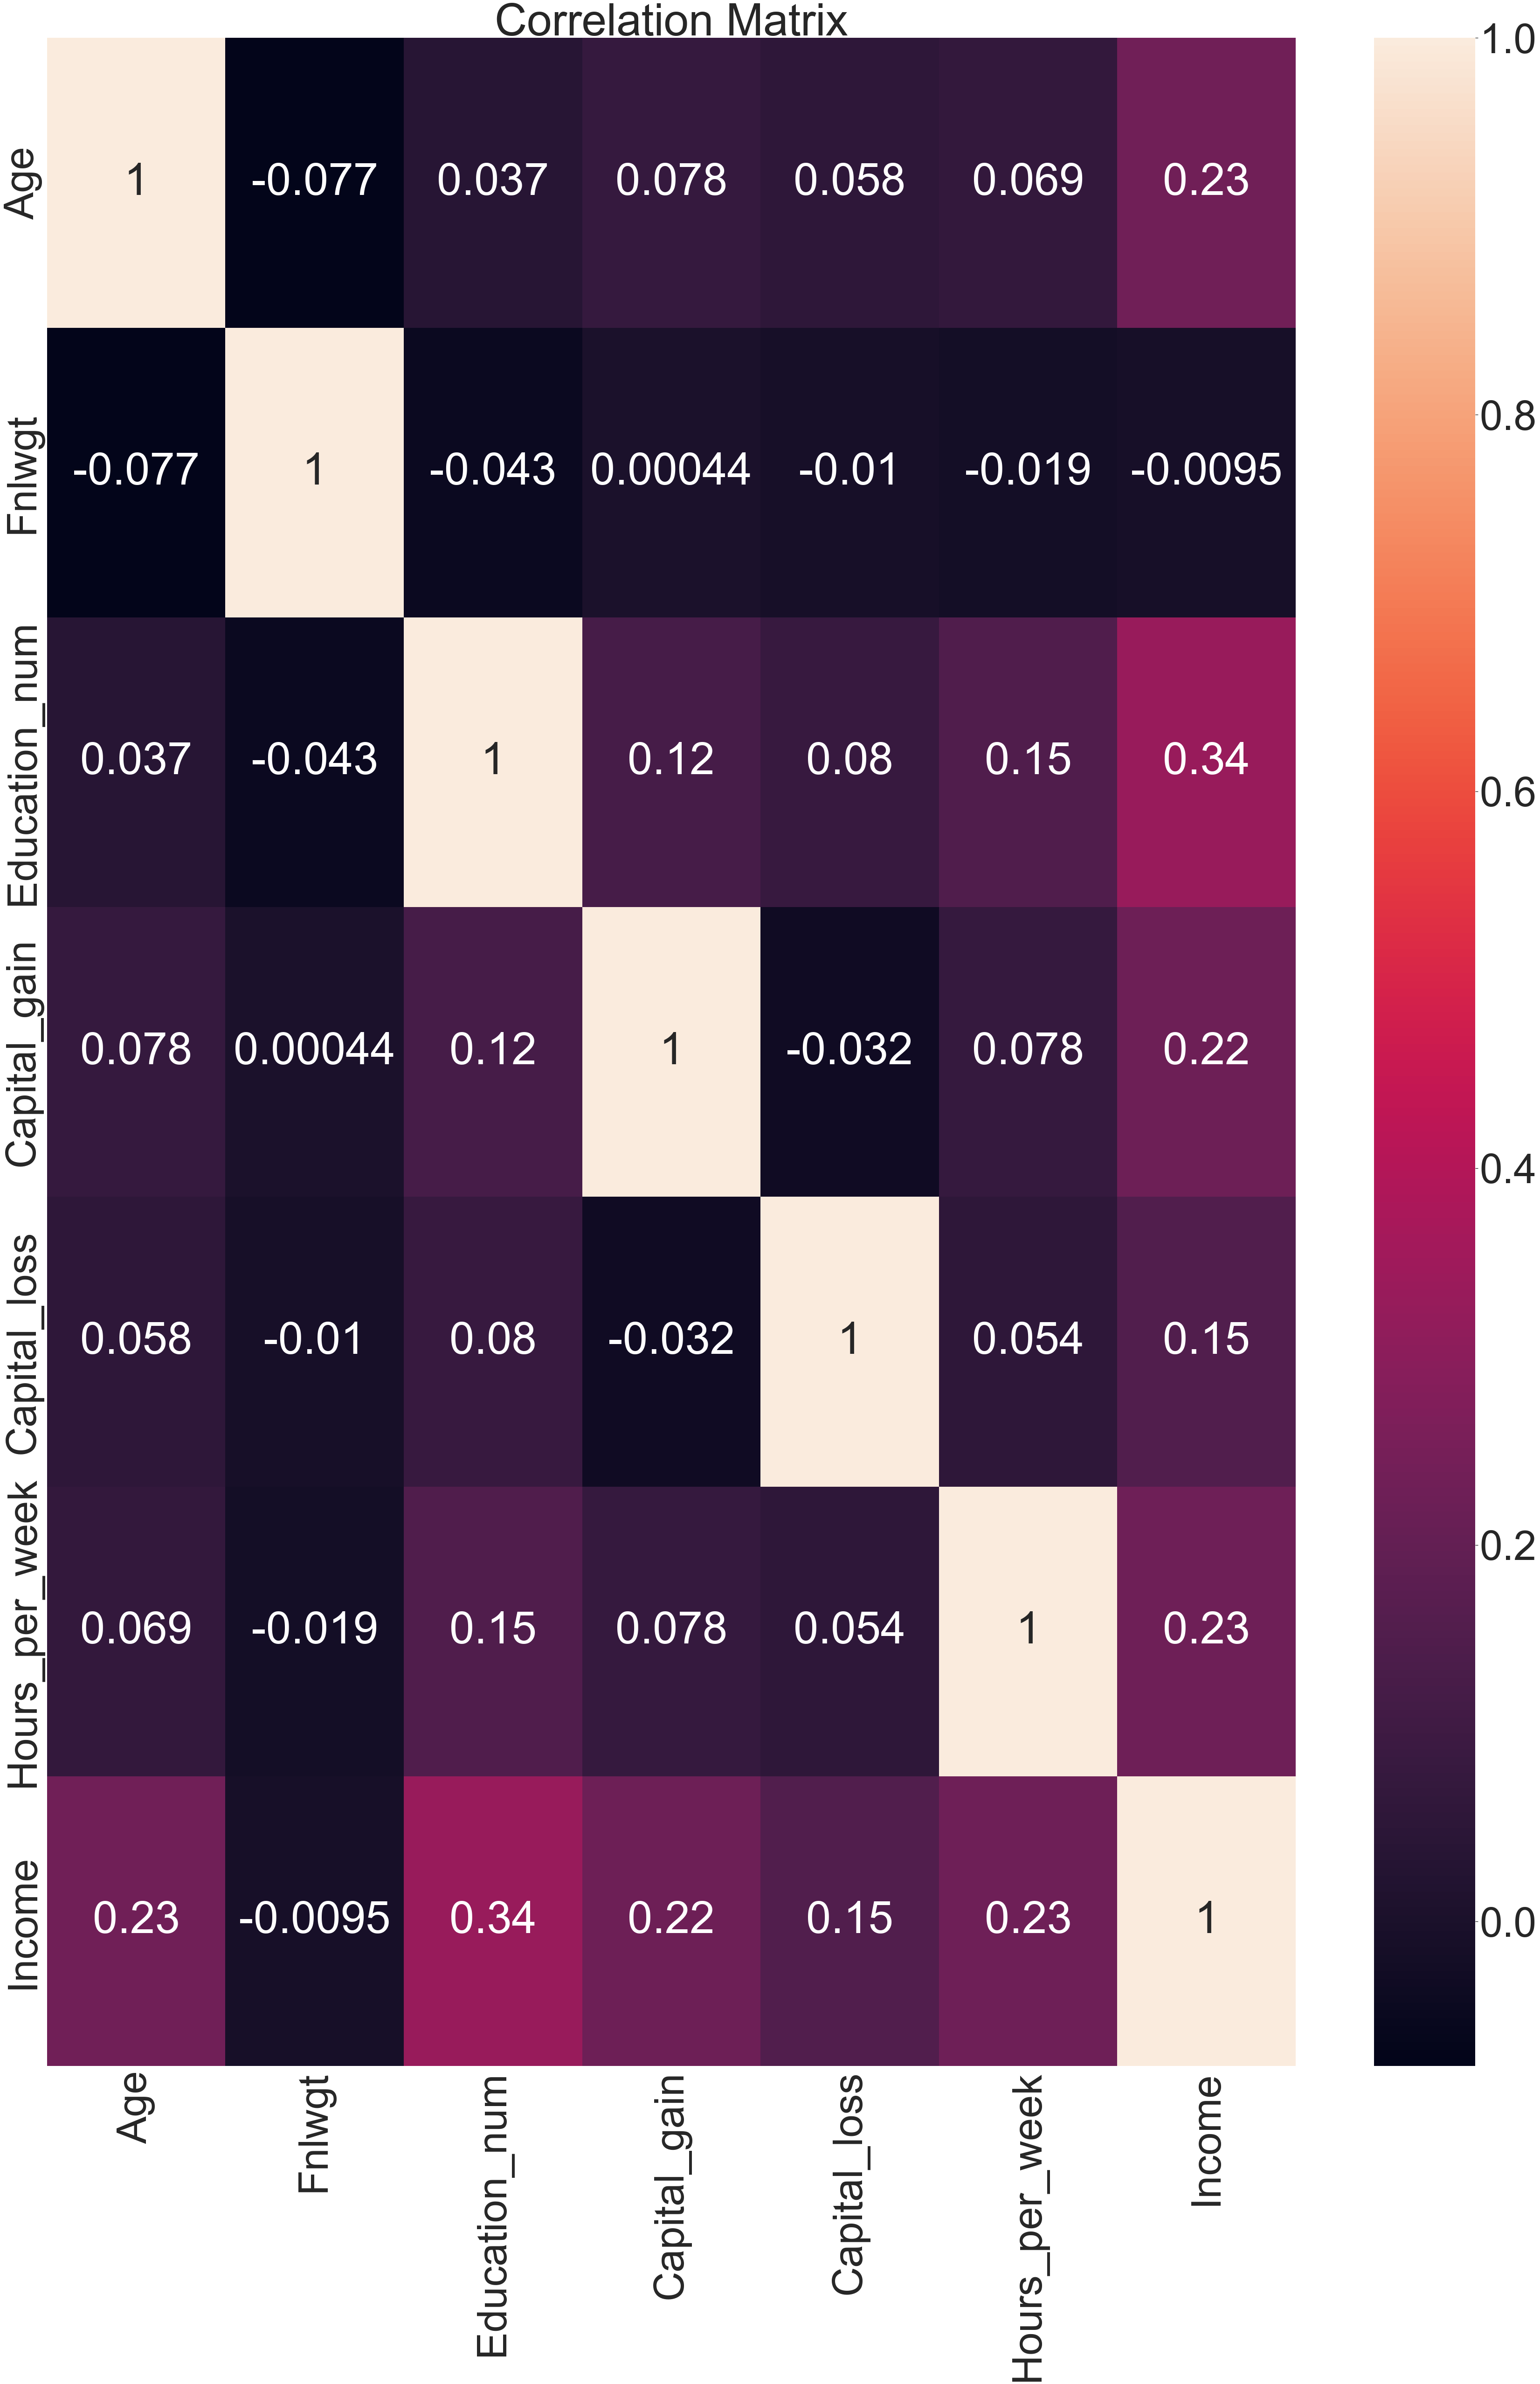

In [22]:
#finding Corr matrix and then plotting the Heatmap
corr_mat=data.corr()

plt.figure(figsize=[60,80])

sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.jpg')
plt.show()

<h3><font color='red'><u>Inferences from the above plots:</u></font></h3><h4>
1. As sensitive as it was, with Gender and Race, had to crosscheck with the sample population as well.
<br>2. Hence we can say that, in this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.    
<br>3. Sample population has been recorded with more samples for men and white race, hence maybe showing some bias there.
<br>4. but from the sample both male and female have the same pattern..
<br>5. From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

<h3><font color='maroon'><u>Feature Selection and Pre Model Building Steps</u></font></h3>

Lets start our Feature Selection and pre model building steps

In [23]:
data1=data ##--------Proxy data for convenience and security

In [24]:
data1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [25]:
#First lets encode the categorical columns..
for col in data1[num_cat(data1)[1]]:
    data1[col] = LE.fit_transform(data1[col])

In [27]:
data1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,12,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,8,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,6,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,12,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,13,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,11,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,8,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,8,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,8,4,0,3,4,1,0,0,20,38,0


Note the Above data have been encoded where ever there is a categorical data in columns.

In [28]:
X = data1.drop('Income', axis=1)
Y = data1['Income']

In [29]:
#sclar = StandardScaler()
#sclar.fit_transform(X_resampled)

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [30]:
#First let us remove imbalances frmm the Dataset using Random oversampler

ROS = RandomOverSampler(random_state=42)
ROS.fit(X, Y)
X_resampled, Y_resampled = ROS.fit_resample(X, Y)

In [31]:
# Checking if its balanced.
Y_resampled.value_counts(normalize=True)


0    0.5
1    0.5
Name: Income, dtype: float64

In [32]:
#Now that the label samples are balanced..we can go forward.
#Now lets use Best K features to see which are the most relevant features.. and which among them can be dropping.

bestk = SelectKBest(score_func=f_classif,k=14)
fit=bestk.fit(X_resampled,Y_resampled)
df_scores=pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(14,'Score'))

      Feature_Name        Score
4    Education_num  8452.211702
7     Relationship  4490.859454
0              Age  4421.481411
12  Hours_per_week  3968.755869
9              Sex  3816.643012
5   Marital_status  3625.025643
10    Capital_gain  1674.359678
11    Capital_loss  1152.636568
3        Education   520.954445
8             Race   374.232110
6       Occupation    95.123550
13  Native_country    34.196953
2           Fnlwgt     2.149785
1        Workclass     0.393633


In [33]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             49438 non-null  float64
 1   Workclass       49438 non-null  float64
 2   Fnlwgt          49438 non-null  float64
 3   Education       49438 non-null  float64
 4   Education_num   49438 non-null  float64
 5   Marital_status  49438 non-null  float64
 6   Occupation      49438 non-null  float64
 7   Relationship    49438 non-null  float64
 8   Race            49438 non-null  float64
 9   Sex             49438 non-null  float64
 10  Capital_gain    49438 non-null  float64
 11  Capital_loss    49438 non-null  float64
 12  Hours_per_week  49438 non-null  float64
 13  Native_country  49438 non-null  float64
dtypes: float64(14)
memory usage: 5.3 MB


<h4><font color='red'>Note: From the feature selection and the EDA conducted, ive decided that i will not drop the weight, but instead drop gender, as it is a problem with the sample gathering and not the real stats.
<br> Also, logic states that Occupation matters for the salary to be higher or lower.
<br> Finally, if i have to follow the 50% +3or4 feature retention logic, as a starting point, we need to remove around 6 features. They would be native_country,Race,Capital_loss, sex

In [34]:
X_resampled = X_resampled.drop([ 'Race', 'Sex','Capital_loss', 'Native_country'], axis=1)
X_resampled

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Hours_per_week
0,0.837097,1.721336,-1.008742,-0.335443,1.134779,-0.406183,-0.790156,-0.900177,-0.145914,-2.222120
1,-0.042640,-0.085223,0.245046,0.181319,-0.420027,-1.734026,-0.286703,-0.277810,-0.145914,-0.035430
2,1.057031,-0.085223,0.425770,-2.402489,-1.197429,-0.406183,-0.286703,-0.900177,-0.145914,-0.035430
3,-0.775755,-0.085223,1.408146,-0.335443,1.134779,-0.406183,0.720204,2.211658,-0.145914,-0.035430
4,-0.115952,-0.085223,0.898170,0.439700,1.523480,-0.406183,-0.790156,2.211658,-0.145914,-0.035430
...,...,...,...,...,...,...,...,...,...,...
49433,1.276966,-0.085223,-0.475288,-0.335443,1.134779,-1.734026,-0.790156,-0.277810,-0.145914,0.369513
49434,0.030671,-2.795062,0.105982,1.214842,-0.031325,-0.406183,-1.545336,0.344557,-0.145914,0.369513
49435,0.177294,-0.085223,1.544813,-0.335443,1.134779,-0.406183,0.720204,-0.900177,0.895075,1.179398
49436,-0.555821,-0.085223,-0.128821,0.439700,1.523480,-0.406183,-0.790156,-0.900177,-0.145914,1.584340


<h3><font color='maroon'><u>Model Building and Predictions</u></font></h3>

In [50]:
#Function to choose best classification model, its metrics, and random state
mod=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
max_acc_score=0
max_f1score=0
for r_state in range(30,99):
    train_x,test_x,train_y,test_y=train_test_split(X_resampled,Y_resampled,random_state=r_state,test_size=0.2)
    
    for i in mod:
        i.fit(train_x,train_y)
        pred_y = i.predict(test_x)
        acc_score=accuracy_score(test_y,pred_y)
        f1_Score=f1_score(test_y,pred_y)
        print("Accuracy score corresponding to random state ",r_state,"is",acc_score, "with f1 Score ", f1_Score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            max_f1score=f1_Score
            final_state= r_state
            final_model = i
            
            
print("\n\n\n\n\n")
print("Max Accuracy score corresponding to random state ",final_state,"is",max_acc_score,"and best model is ",final_model, "with f1score as ",max_f1score)

Accuracy score corresponding to random state  30 is 0.7596076051779935 with f1 Score  0.7586557010864048
Accuracy score corresponding to random state  30 is 0.8398058252427184 with f1 Score  0.848537005163511
Accuracy score corresponding to random state  30 is 0.9130258899676376 with f1 Score  0.9174188592279624
Accuracy score corresponding to random state  30 is 0.9296116504854369 with f1 Score  0.9325450668734251
Accuracy score corresponding to random state  31 is 0.754955501618123 with f1 Score  0.7557213428773063
Accuracy score corresponding to random state  31 is 0.83667071197411 with f1 Score  0.846263683960019
Accuracy score corresponding to random state  31 is 0.9140372168284789 with f1 Score  0.9182063125481139
Accuracy score corresponding to random state  31 is 0.9305218446601942 with f1 Score  0.9333592006984189
Accuracy score corresponding to random state  32 is 0.7561690938511327 with f1 Score  0.7530472190924922
Accuracy score corresponding to random state  32 is 0.840716

<h3><font color='maroon'><u>Hyper Parameter Tuning(HPT)</u></font></h3>

In [36]:
n_estimators = [int(x) for x in np.linspace(start=20, stop=150, num=25)]
max_depth = [int(x) for x in np.linspace(20, 150, num=25)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}


In [37]:
RFC_HPT = RandomForestClassifier(random_state=69)
rf_cv = RandomizedSearchCV(
    estimator=RFC_HPT, param_distributions=param_dist, cv=5, random_state=69)

In [38]:
rf_cv.fit(train_x,train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=69),
                   param_distributions={'max_depth': [20, 25, 30, 36, 41, 47,
                                                      52, 57, 63, 68, 74, 79,
                                                      85, 90, 95, 101, 106, 112,
                                                      117, 122, 128, 133, 139,
                                                      144, 150],
                                        'n_estimators': [20, 25, 30, 36, 41, 47,
                                                         52, 57, 63, 68, 74, 79,
                                                         85, 90, 95, 101, 106,
                                                         112, 117, 122, 128,
                                                         133, 139, 144, 150]},
                   random_state=69)

In [39]:
print(f'best score is ',rf_cv.best_score_)

best score is  0.9137041719342605


In [40]:
print(f'\nBest parameters are ', rf_cv.best_params_)


Best parameters are  {'n_estimators': 150, 'max_depth': 95}


In [43]:
RFC_best = RandomForestClassifier(
    max_depth=95, n_estimators=150, random_state=69)
RFC_best.fit(train_x, train_y)

RandomForestClassifier(max_depth=95, n_estimators=150, random_state=69)

In [45]:
Y_pred_RFC_best = RFC_best.predict(test_x)

In [47]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(test_y, Y_pred_RFC_best) * 100, 2))
print('F1 score:', round(f1_score(test_y, Y_pred_RFC_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.44
F1 score: 92.74


<h3><font color='maroon'><u>Metrics for the Classification Problem</u></font></h3>

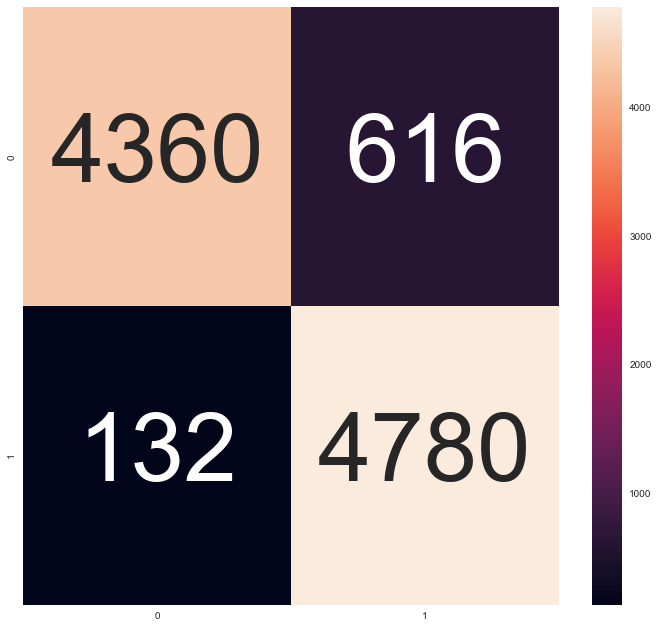

In [48]:
#After the HPT, lets look at the confusion matrix, to look at the number of True Positives...
Conf_mat = confusion_matrix(test_y, Y_pred_RFC_best)

plt.style.use('seaborn')
plt.figure(figsize=(12, 11))
sns.heatmap(Conf_mat, annot=True, fmt='d')
plt.show()

In [49]:
#Finally lets look at the classification report

print(classification_report(test_y, Y_pred_RFC_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4976
           1       0.89      0.97      0.93      4912

    accuracy                           0.92      9888
   macro avg       0.93      0.92      0.92      9888
weighted avg       0.93      0.92      0.92      9888



<h3><font color='maroon'><u>Summary of steps mentioned in the beginning</u></font></h3>